In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import timeit

X = np.array([[2, 0], [3, 0], [4, 0], [10, 0], [11, 0], [12, 0],
              [20, 0], [25, 0], [30, 0]])
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

<Figure size 640x480 with 1 Axes>

In [34]:
# 1회차
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1,
               max_iter=1, random_state=1).fit(X)
c0, c1 = model1.cluster_centers_
c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [7]:
# 10회차
model10 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1,
               max_iter=10, random_state=1).fit(X)
c0, c1 = model10.cluster_centers_
c0, c1

(array([7., 0.]), array([25.,  0.]))

In [9]:
# 1. SSE 측정
model1.score(X), model10.score(X)

(-372.75, -150.0)

In [12]:
X[model1.labels_,0]

array([2, 2, 2, 3, 3, 3, 3, 3, 3])

In [13]:
np.mean(X[:, 0]), np.mean(X[model1.labels_ == 0, 0]), np.count_nonzero(X[model1.labels_,0]== 2), np.mean(X[model1.labels_==0,0])

(13.0, 3.0, 3, 3.0)

In [14]:
np.mean(X[:, 0]), np.mean(X[model1.labels_ == 1, 0]), np.count_nonzero(X[model1.labels_,0]== 3), np.mean(X[model1.labels_==1,0])

(13.0, 18.0, 6, 18.0)

In [16]:
def k_cohesion(model1, c0, c1):
    total_mean=np.mean(X[:,0])
    m1=np.mean(X[model1.labels_==0,0])
    m2=np.mean(X[model1.labels_==1,0])
    count1=np.count_nonzero(X[model1.labels_,0]== 2)
    count2=np.count_nonzero(X[model1.labels_,0]== 3)
    separation=count1*(total_mean-m1)**2+count2*(m2-total_mean)**2
    print(separation)

In [17]:
# 2. Cohesion 측정
k_cohesion(model1,c0,c1)

450.0


In [18]:
X[model10.labels_,0]

array([2, 2, 2, 2, 2, 2, 3, 3, 3])

In [19]:
np.mean(X[:, 0]), np.mean(X[model10.labels_ == 0, 0]), np.count_nonzero(X[model10.labels_,0]== 2), np.mean(X[model10.labels_==0,0])

(13.0, 7.0, 6, 7.0)

In [20]:
np.mean(X[:, 0]), np.mean(X[model10.labels_ == 1, 0]), np.count_nonzero(X[model10.labels_,0]== 3), np.mean(X[model10.labels_==1,0])

(13.0, 25.0, 3, 25.0)

In [21]:
# 2. Cohesion 측정
k_cohesion(model10,c0,c1)

648.0


In [35]:
# 비교군집 10회차 - 3클러스터
model3 = KMeans(n_clusters=3, init='random', n_init=100,
               max_iter=100, random_state=1).fit(X)
c30, c31, c32 = model3.cluster_centers_
c30, c31, c32

(array([11.,  0.]), array([25.,  0.]), array([3., 0.]))

In [36]:
list1=[]
list1.clear()
np.count_nonzero(X)

9

In [40]:
def s_matrix(model1):
    for i in range(0,np.count_nonzero(X)):
        list1.append([])
        for j in range(0,np.count_nonzero(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else :
                list1[i].append(0)

In [41]:
s_matrix(model1)

In [42]:
#3. 유사성 매트릭스 평가
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [45]:
#3. 유사성 매트릭스 평가
list1.clear()
s_matrix(model3)
list1

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [46]:
def entropy(labels):
    """ Computes entropy of 0-1 vector. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    counts = np.bincount(labels)
    probs = counts[np.nonzero(counts)] / n_labels
    n_classes = len(probs)

    if n_classes <= 1:
        return 0
    return - np.sum(probs * np.log(probs)) / np.log(n_classes)

In [71]:
# 2회차 비교군집
model2 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1,
               max_iter=2, random_state=1).fit(X)
c20, c21 = model2.cluster_centers_
c20, c21

(array([3., 0.]), array([18.,  0.]))

In [72]:
def plot_cluster(model, c0, c1):
    plt.scatter(X[model.labels_ == 0, 0],
                X[model.labels_ == 0, 1], s=100, marker='v', c='r')
    plt.scatter(X[model.labels_ == 1, 0],
                X[model.labels_ == 1, 1], s=100, marker='^', c='b')
    plt.scatter(c0[0], c0[1], s=200, c="r")
    plt.scatter(c1[0], c1[1], s=200, c="b")
    plt.show()

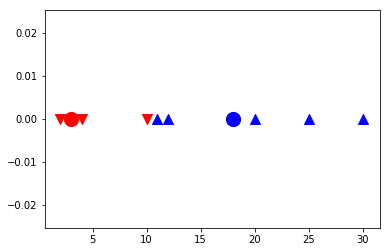

In [73]:
plot_cluster(model2, c20, c21)

In [74]:
entropy(model1.labels_)

0.9182958340544894

In [75]:
entropy(model2.labels_)

0.9910760598382222

In [76]:
entropy(model3.labels_)

0.9999999999999998